In [26]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
datapath = "../data/raw/athlete_events.csv"

df = pd.read_csv(datapath)

df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [35]:
df2 = pd.read_csv("../data/raw/noc_regions.csv")

df2

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [36]:
np.unique(list(df2["notes"]))

array(['Antigua and Barbuda', 'Australasia', 'Bohemia', 'Crete',
       'Hong Kong', 'Individual Olympic Athletes', 'Netherlands Antilles',
       'Newfoundland', 'North Borneo', 'North Yemen',
       'Refugee Olympic Team', 'Serbia and Montenegro', 'South Yemen',
       'Trinidad and Tobago', 'Turks and Caicos Islands', 'Tuvalu',
       'United Arab Republic', 'Unknown', 'Virgin Islands',
       'West Indies Federation', 'Yugoslavia', 'nan'], dtype='<U32')

In [37]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [38]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [39]:
# Drop rows with missing values in 'Sex', 'Age', 'Height', or 'Weight'
df.dropna(subset=['Sex', 'Age', 'Height', 'Weight'], inplace=True)

In [41]:
df['Medal'] = df['Medal'].fillna(0)

In [42]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


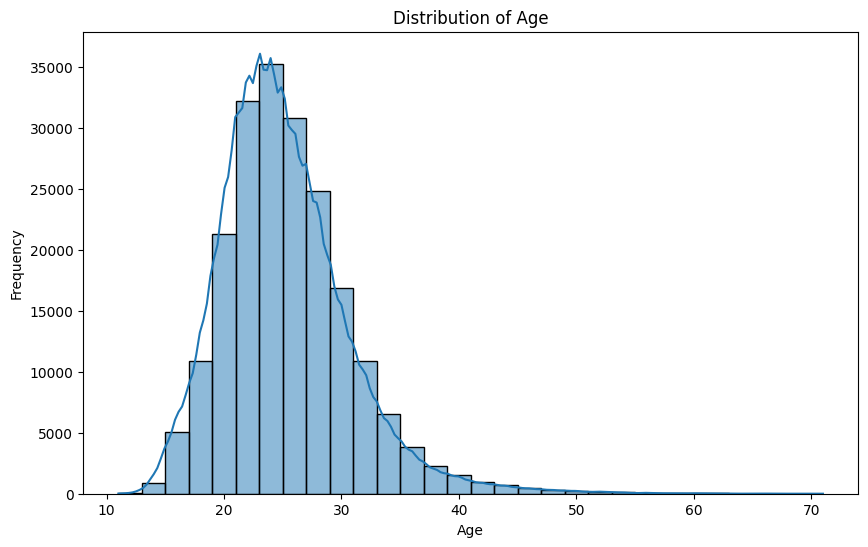

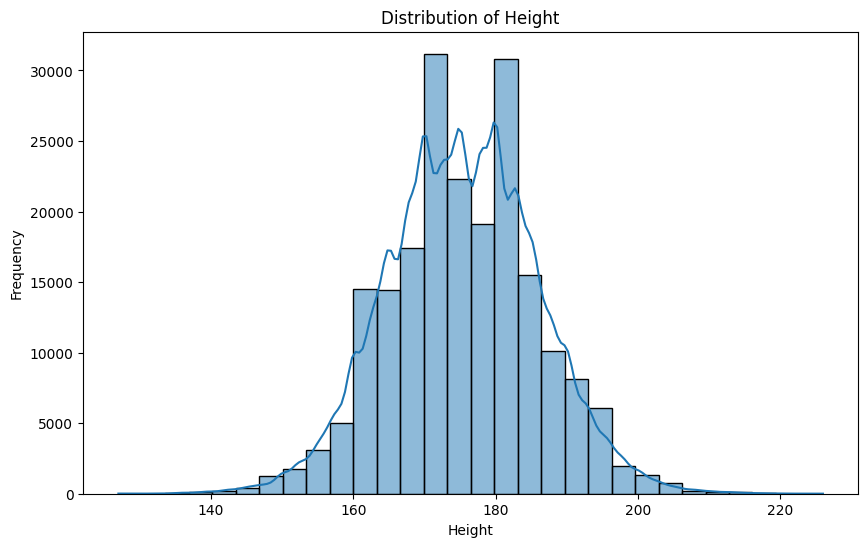

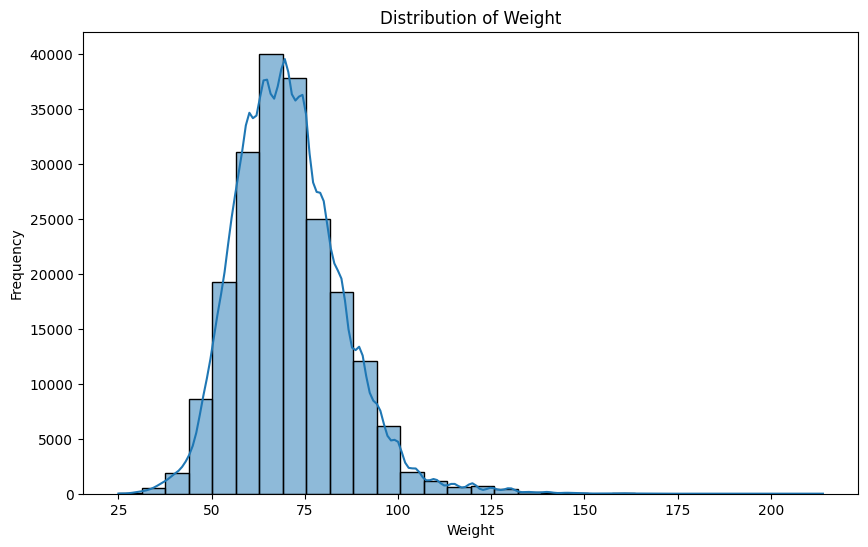

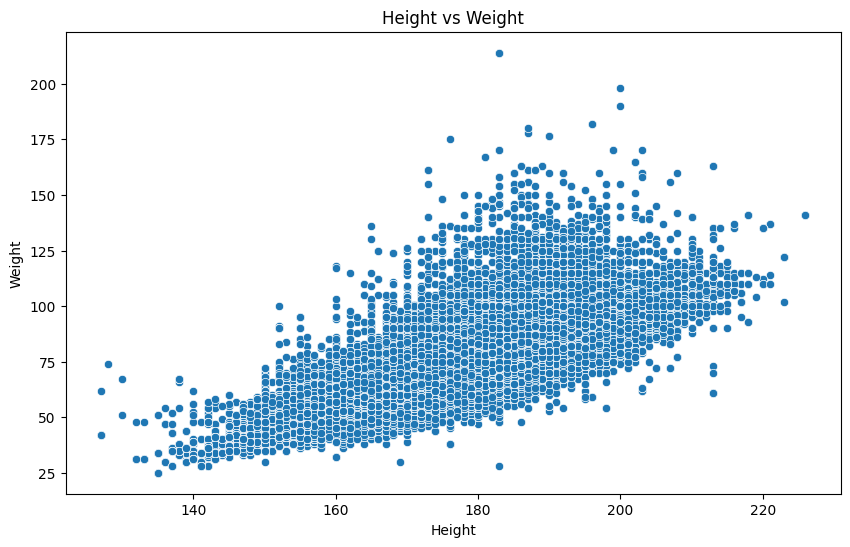

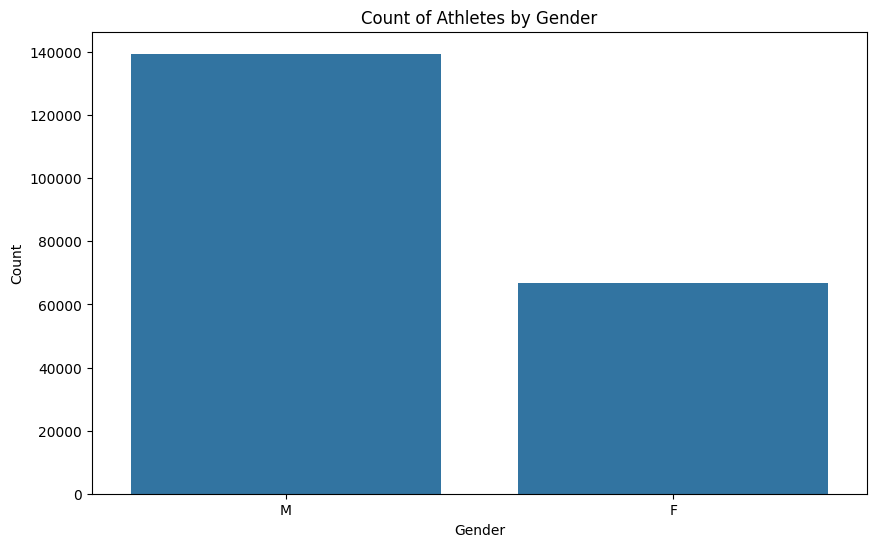

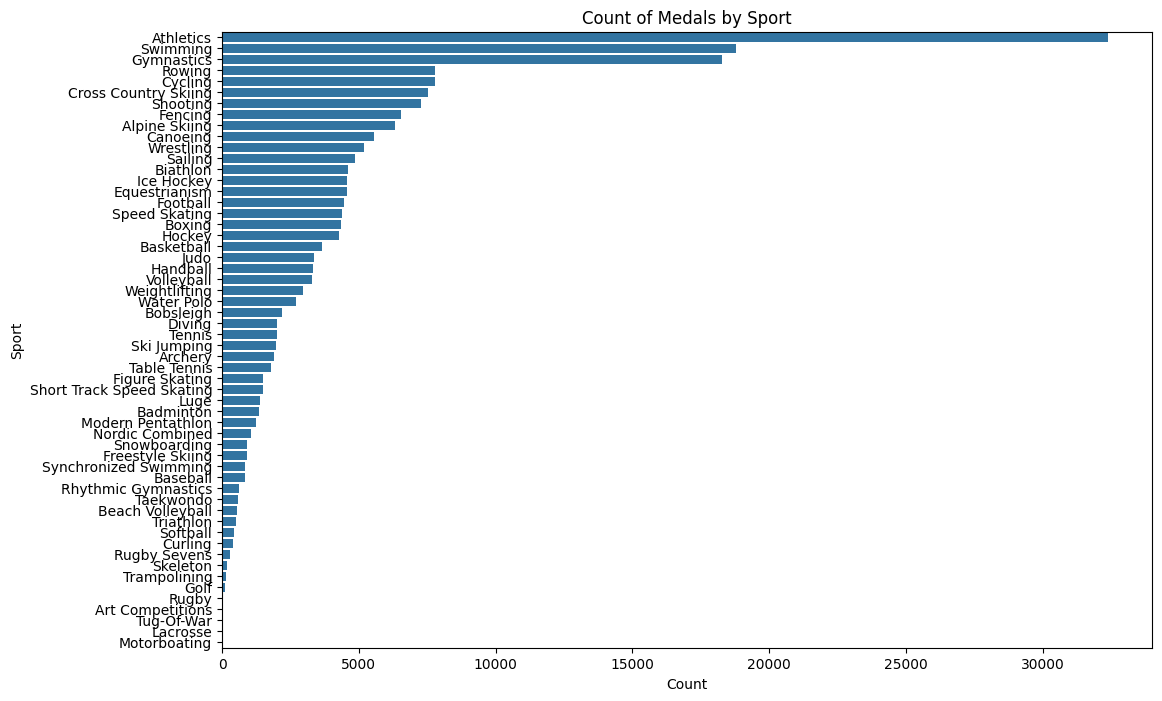

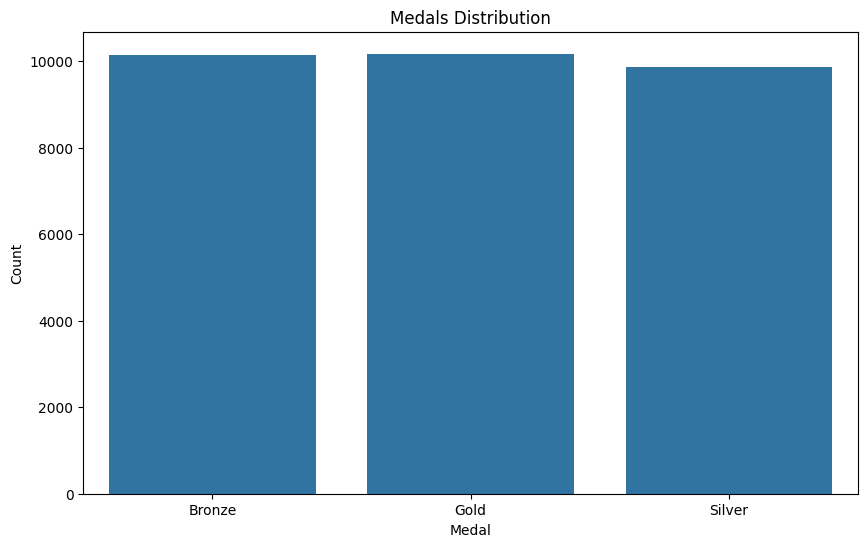

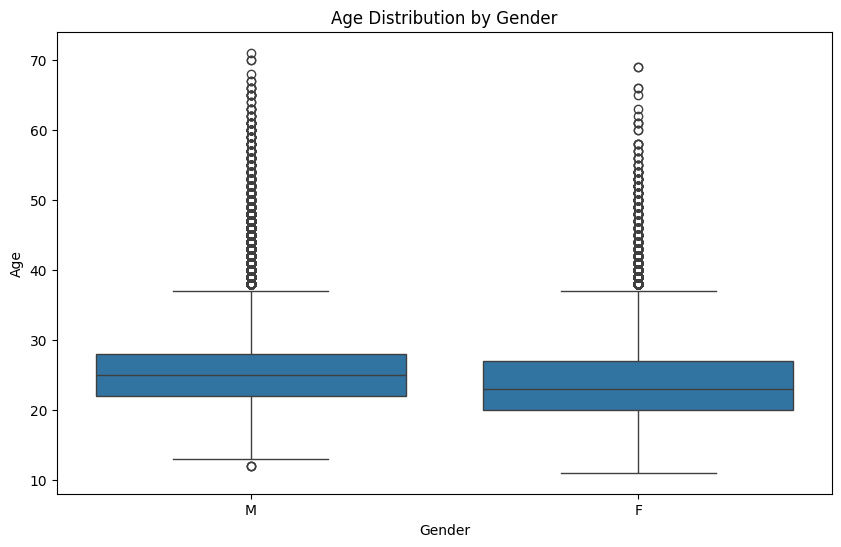

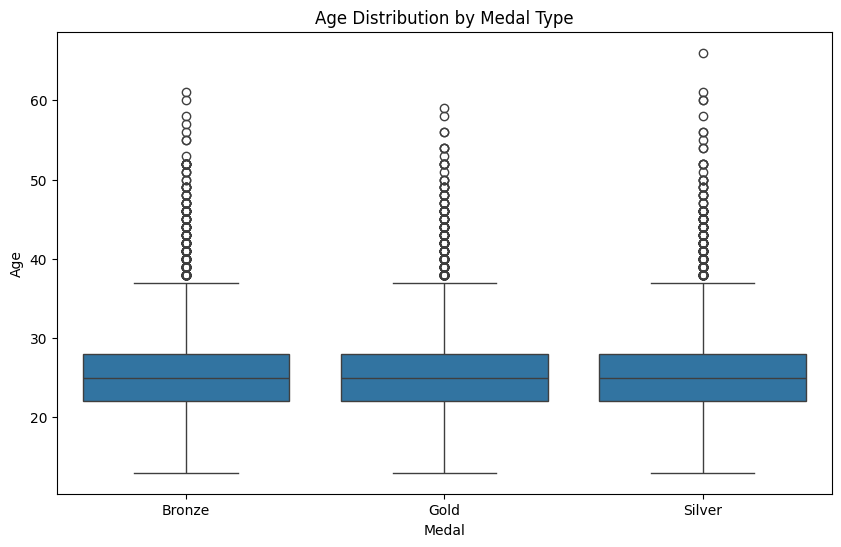

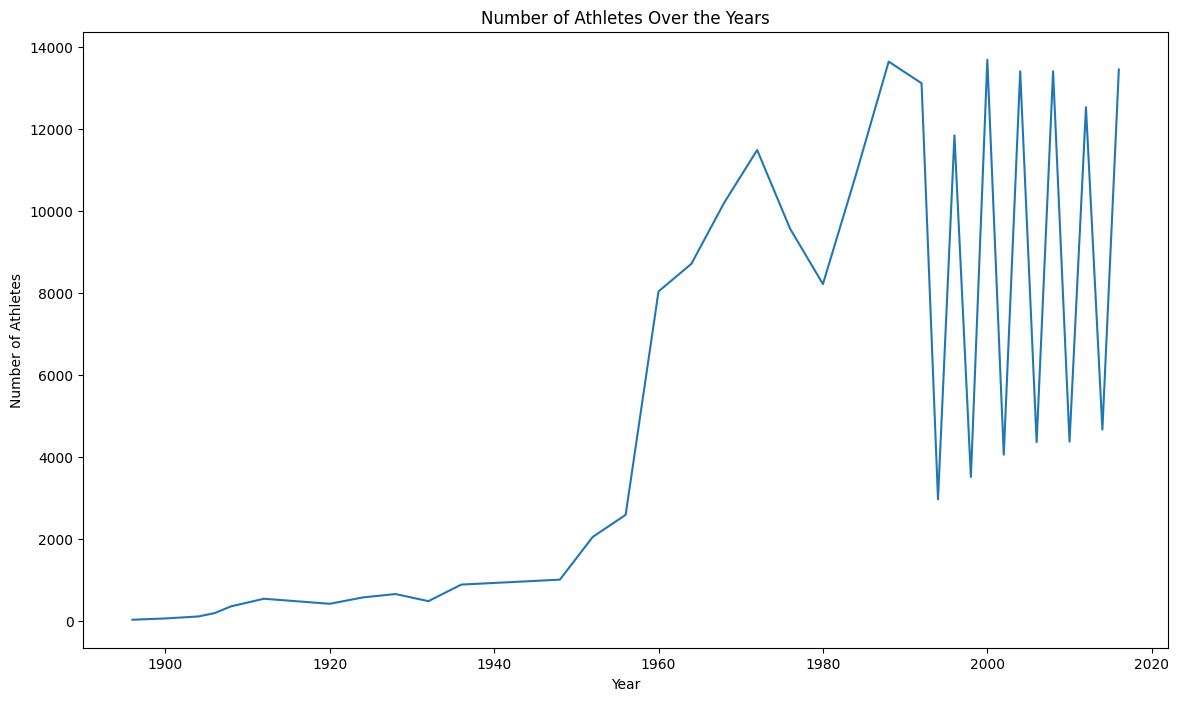

In [25]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Height'], bins=30, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

# Relationship between Height and Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Count of athletes by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.title('Count of Athletes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Count of medals by sport
plt.figure(figsize=(12, 8))
sns.countplot(y='Sport', data=df, order=df['Sport'].value_counts().index)
plt.title('Count of Medals by Sport')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.show()

# Medals distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Medal', data=df)
plt.title('Medals Distribution')
plt.xlabel('Medal')
plt.ylabel('Count')
plt.show()

# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Age distribution by medal type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medal', y='Age', data=df)
plt.title('Age Distribution by Medal Type')
plt.xlabel('Medal')
plt.ylabel('Age')
plt.show()

# Number of athletes over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='ID', data=df.groupby('Year').count().reset_index())
plt.title('Number of Athletes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()

In [43]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


In [44]:
# Drop multiple columns
df = df.drop(['ID', 'Team', 'City', 'Games', 'Year'], axis=1)

df

,Name,Sex,Age,Height,Weight,NOC,Season,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,Summer,Basketball,Basketball Men's Basketball,0
1,A Lamusi,M,23.0,170.0,60.0,CHN,Summer,Judo,Judo Men's Extra-Lightweight,0
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Winter,Speed Skating,Speed Skating Women's 500 metres,0
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,NED,Winter,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,POL,Winter,Luge,Luge Mixed (Men)'s Doubles,0
271112,Piotr ya,M,27.0,176.0,59.0,POL,Winter,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,Piotr ya,M,27.0,176.0,59.0,POL,Winter,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,Winter,Bobsleigh,Bobsleigh Men's Four,0


In [51]:
# Filter rows where column 'A' is greater than 2
athletics_df =  df[df['Sport'] == "Athletics"]
athletics_df

,Name,Sex,Age,Height,Weight,NOC,Season,Sport,Event,Medal
57,Timo Antero Aaltonen,M,31.0,189.0,130.0,FIN,Summer,Athletics,Athletics Men's Shot Put,0
94,Evald rma (rman-),M,24.0,174.0,70.0,EST,Summer,Athletics,Athletics Men's Pole Vault,0
98,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,FRA,Summer,Athletics,"Athletics Men's 1,500 metres",0
130,Erling Rudolf Aastad,M,22.0,177.0,74.0,NOR,Summer,Athletics,Athletics Men's 4 x 100 metres Relay,0
131,Erling Rudolf Aastad,M,22.0,177.0,74.0,NOR,Summer,Athletics,Athletics Men's Long Jump,0
...,...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,URS,Summer,Athletics,Athletics Women's Shot Put,Silver
271079,Galina Ivanovna Zybina (-Fyodorova),F,29.0,168.0,80.0,URS,Summer,Athletics,Athletics Women's Shot Put,0
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,URS,Summer,Athletics,Athletics Women's Shot Put,Bronze
271102,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,RUS,Summer,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [52]:
athletics_df = athletics_df.drop(["Season", "Sport"], axis=1)

athletics_df

,Name,Sex,Age,Height,Weight,NOC,Event,Medal
57,Timo Antero Aaltonen,M,31.0,189.0,130.0,FIN,Athletics Men's Shot Put,0
94,Evald rma (rman-),M,24.0,174.0,70.0,EST,Athletics Men's Pole Vault,0
98,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,FRA,"Athletics Men's 1,500 metres",0
130,Erling Rudolf Aastad,M,22.0,177.0,74.0,NOR,Athletics Men's 4 x 100 metres Relay,0
131,Erling Rudolf Aastad,M,22.0,177.0,74.0,NOR,Athletics Men's Long Jump,0
...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,URS,Athletics Women's Shot Put,Silver
271079,Galina Ivanovna Zybina (-Fyodorova),F,29.0,168.0,80.0,URS,Athletics Women's Shot Put,0
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,URS,Athletics Women's Shot Put,Bronze
271102,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,RUS,Athletics Women's 4 x 400 metres Relay,Bronze


In [56]:
# Filter rows where column 'A' is greater than 2
athleticsM_df =  athletics_df[athletics_df['Sex'] == "M"]
athleticsM_df = athleticsM_df.drop(["Sex"], axis=1)

athleticsM_df

,Name,Age,Height,Weight,NOC,Event,Medal
57,Timo Antero Aaltonen,31.0,189.0,130.0,FIN,Athletics Men's Shot Put,0
94,Evald rma (rman-),24.0,174.0,70.0,EST,Athletics Men's Pole Vault,0
98,Jamale (Djamel-) Aarrass (Ahrass-),30.0,187.0,76.0,FRA,"Athletics Men's 1,500 metres",0
130,Erling Rudolf Aastad,22.0,177.0,74.0,NOR,Athletics Men's 4 x 100 metres Relay,0
131,Erling Rudolf Aastad,22.0,177.0,74.0,NOR,Athletics Men's Long Jump,0
...,...,...,...,...,...,...,...
270959,Lloyd Zvasiya,23.0,190.0,80.0,ZIM,Athletics Men's 400 metres,0
271025,Vlastimil Zwiefelhofer,27.0,170.0,63.0,TCH,Athletics Men's Marathon,0
271044,"Victor Andrew ""Vic"" Zwolak",25.0,175.0,64.0,USA,"Athletics Men's 3,000 metres Steeplechase",0
271045,Krzysztof Zwoliski,21.0,175.0,70.0,POL,Athletics Men's 100 metres,0


In [65]:
events = np.unique(list(athleticsM_df.Event))
for e in events:
    print(e, athleticsM_df[athleticsM_df['Event'] == e].shape[0])

Athletics Men's 1,500 metres 916
Athletics Men's 1,500 metres Walk 1
Athletics Men's 1,600 metres Medley Relay 12
Athletics Men's 10 kilometres Walk 38
Athletics Men's 10 mile Walk 6
Athletics Men's 10,000 metres 728
Athletics Men's 100 metres 1417
Athletics Men's 110 metres Hurdles 702
Athletics Men's 2,500 metres Steeplechase 3
Athletics Men's 2,590 metres Steeplechase 4
Athletics Men's 20 kilometres Walk 673
Athletics Men's 200 metres 1123
Athletics Men's 200 metres Hurdles 5
Athletics Men's 3 mile, Team 12
Athletics Men's 3,000 metres Steeplechase 632
Athletics Men's 3,000 metres Walk 6
Athletics Men's 3,000 metres, Team 46
Athletics Men's 3,200 metres Steeplechase 9
Athletics Men's 3,500 metres Walk 4
Athletics Men's 4 mile, Team 5
Athletics Men's 4 x 100 metres Relay 1587
Athletics Men's 4 x 400 metres Relay 1513
Athletics Men's 4,000 metres Steeplechase 2
Athletics Men's 400 metres 1094
Athletics Men's 400 metres Hurdles 692
Athletics Men's 5 mile 20
Athletics Men's 5,000 metres

In [69]:
athleticsM400_df = athleticsM_df[athleticsM_df['Event'] == "Athletics Men's 400 metres"]
athleticsM400_df = athleticsM400_df.drop(['Event'],axis=1)


athleticsM400_df

,Name,Age,Height,Weight,NOC,Medal
232,Abubakar Abbas Abbas,20.0,175.0,66.0,BRN,0
240,Maher Abbas,22.0,178.0,78.0,LIB,0
367,Moustafa Abdel Naser,21.0,176.0,74.0,LBA,0
480,Hassane Abdou,23.0,185.0,67.0,COM,0
1069,Nagmeldin Ali Abubakr,18.0,172.0,63.0,SUD,0
...,...,...,...,...,...,...
268124,Sergey Aleksandrovich Zaykov,24.0,190.0,76.0,KAZ,0
268573,Michael Zerbes,24.0,195.0,81.0,GDR,0
270595,Feliks Grzegorz uber,22.0,167.0,60.0,POL,0
270760,Mauro Carlo Zuliani,20.0,175.0,62.0,ITA,0


In [70]:
save_path= "../data/processed/MEN400.csv"

athleticsM400_df.to_csv(save_path)